In [49]:
import torch
import torch.utils.data as Data
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np

text = np.load('/Users/ww/Desktop/stuff/multimodal ml codes/data/word2vec.npy')
image = np.load('/Users/ww/Desktop/stuff/multimodal ml codes/data/train_image_embedding.npy')

In [50]:
text.shape, image.shape

((6126, 300), (6126, 512))

In [52]:
#####image to text
input_dimension = 512
output_dimension = 300
batch_size = 32
EPOCH = 100

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden1 = nn.Linear(input_dimension,400)
        self.hidden1.weight.data.normal_(0,0.5)
        self.dropout1 = nn.Dropout(0.5)
        self.relu1 = nn.LeakyReLU(0.2, inplace=True)
        self.predict = nn.Linear(400, output_dimension)
        self.predict.weight.data.normal_(0,0.5)
        
    def forward(self,x):
        x = self.hidden1(x)
        x = self.dropout1(x)
        x = self.relu1(x)
        x = self.predict(x)
        return x

In [53]:
#####image to text
net = Net()
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr = 0.5)
train_x = torch.from_numpy(image).type(torch.FloatTensor)
train_y = torch.from_numpy(text).type(torch.FloatTensor)

train_torch_dataset = Data.TensorDataset(train_x,  train_y)
train_loader = Data.DataLoader(
    dataset = train_torch_dataset,
    batch_size = batch_size,
    shuffle = True,
    num_workers = 2)

In [59]:
#####image to text
loss_box = []
for epoch in range(40):
    for step, (b_x, b_y) in enumerate(train_loader):        # gives batch data
        b_x = Variable(b_x)
        b_y = Variable(b_y)

        output = net(b_x)                              
        loss = loss_func(output, b_y)                   
        optimizer.zero_grad()                           
        loss.backward()                                
        optimizer.step() 
        loss_box.append(loss.item())
        if step%100 ==0:
            print (epoch,"train_loss:",loss.item())

0 train_loss: 19548.78515625
0 train_loss: 82084.328125
1 train_loss: 15486.08984375
1 train_loss: 10383.328125
2 train_loss: 5227.1513671875
2 train_loss: 5198.56005859375
3 train_loss: 3233.083251953125
3 train_loss: 1819.2314453125
4 train_loss: 1571.1700439453125
4 train_loss: 985.074462890625
5 train_loss: 799.7312622070312
5 train_loss: 1252.2750244140625
6 train_loss: 1188.135986328125
6 train_loss: 707.63623046875
7 train_loss: 638.4408569335938
7 train_loss: 451.0274963378906
8 train_loss: 378.375244140625
8 train_loss: 473.78790283203125
9 train_loss: 295.0971374511719
9 train_loss: 250.08287048339844
10 train_loss: 182.8092803955078
10 train_loss: 154.33084106445312
11 train_loss: 183.45887756347656
11 train_loss: 188.42657470703125
12 train_loss: 135.3167266845703
12 train_loss: 105.79149627685547
13 train_loss: 85.40145111083984
13 train_loss: 279.283203125
14 train_loss: 97.45988464355469
14 train_loss: 94.18049621582031
15 train_loss: 79.66089630126953
15 train_loss: 75.

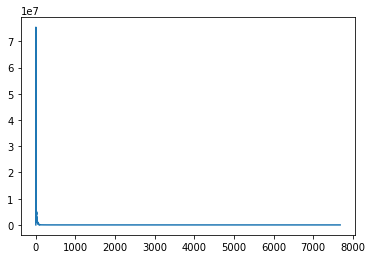

In [60]:
plt.plot(loss_box)
plt.show()

In [69]:
x = net.hidden1(Variable(train_x))
x = net.dropout1(x)
x = net.relu1(x)
image_to_text_hidden_layer = x.data.numpy()

In [70]:
image_to_text_hidden_layer.shape

(6126, 400)

In [79]:
#######text to image
input_dimension = 300
output_dimension = 512
batch_size = 32
EPOCH = 100

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden1 = nn.Linear(input_dimension,400)
        self.hidden1.weight.data.normal_(0,0.5)
        self.dropout1 = nn.Dropout(0.5)
        self.relu1 = nn.LeakyReLU(0.2, inplace=True)
        self.predict = nn.Linear(400, output_dimension)
        self.predict.weight.data.normal_(0,0.5)
        
    def forward(self,x):
        x = self.hidden1(x)
        x = self.dropout1(x)
        x = self.relu1(x)
        x = self.predict(x)
        return x

In [84]:
#######text to image
net = Net()
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr = 0.5)
train_x = torch.from_numpy(text).type(torch.FloatTensor)
train_y = torch.from_numpy(image).type(torch.FloatTensor)

train_torch_dataset = Data.TensorDataset(train_x,  train_y)
train_loader = Data.DataLoader(
    dataset = train_torch_dataset,
    batch_size = batch_size,
    shuffle = True,
    num_workers = 0)

In [85]:
#######text to image
loss_box = []
for epoch in range(40):
    for step, (b_x, b_y) in enumerate(train_loader):        # gives batch data
        b_x = Variable(b_x)
        b_y = Variable(b_y)

        output = net(b_x)                              
        loss = loss_func(output, b_y)                   
        optimizer.zero_grad()                           
        loss.backward()                                
        optimizer.step() 
        loss_box.append(loss.item())
        if step%100 ==0:
            print (epoch,"train_loss:",loss.item())

0 train_loss: 89.16423034667969
0 train_loss: 355.30853271484375
1 train_loss: 83.67070007324219
1 train_loss: 32.437705993652344
2 train_loss: 26.259485244750977
2 train_loss: 10.944101333618164
3 train_loss: 8.274604797363281
3 train_loss: 6.422444820404053
4 train_loss: 4.911138534545898
4 train_loss: 4.772035598754883
5 train_loss: 3.811861753463745
5 train_loss: 2.7520711421966553
6 train_loss: 2.378511667251587
6 train_loss: 1.9722037315368652
7 train_loss: 1.8078927993774414
7 train_loss: 1.62186861038208
8 train_loss: 1.5542911291122437
8 train_loss: 1.3378568887710571
9 train_loss: 1.3352489471435547
9 train_loss: 1.1214896440505981
10 train_loss: 0.9816820621490479
10 train_loss: 1.2506773471832275
11 train_loss: 1.1156984567642212
11 train_loss: 0.918005108833313
12 train_loss: 1.0326415300369263
12 train_loss: 0.8992661237716675
13 train_loss: 0.8413772583007812
13 train_loss: 0.9273940920829773
14 train_loss: 0.9014202952384949
14 train_loss: 0.9819227457046509
15 train_lo

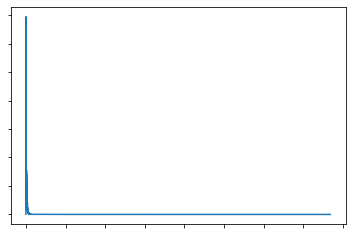

In [87]:
plt.plot(loss_box)
plt.show()

In [88]:
x = net.hidden1(Variable(train_x))
x = net.dropout1(x)
x = net.relu1(x)
text_to_image_hidden_layer = x.data.numpy()

In [89]:
text_to_image_hidden_layer.shape

(6126, 400)

In [90]:
text_to_image_hidden_layer

array([[-0.19959521, -0.        , -0.5484187 , ..., -0.4163961 ,
        -0.        , -0.        ],
       [-0.19959521, -0.        , -0.5484187 , ..., -0.        ,
        -0.3208784 , -0.06179994],
       [-0.19959521, -0.        , -0.5484187 , ..., -0.4163961 ,
        -0.        , -0.        ],
       ...,
       [-0.        , -0.18604164,  0.01658535, ...,  0.36846587,
        -0.        , -0.25732103],
       [-0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -0.165839  ],
       [-0.        , -0.        , -0.        , ..., -0.25386077,
        -0.        ,  0.        ]], dtype=float32)

In [91]:
image_to_text_hidden_layer

array([[ -3.0148075 ,  -0.        ,  -0.37667805, ...,   0.        ,
         -2.915619  , -13.071704  ],
       [ -0.6852356 ,   0.        ,  -2.5744443 , ...,  -0.        ,
          1.6780392 , -12.834122  ],
       [ -0.        ,  -0.        ,  -0.        , ...,  -3.0820606 ,
          2.3322697 , -22.452179  ],
       ...,
       [ -2.8444908 ,  -0.        ,  -0.        , ...,  -0.        ,
         -0.        , -49.02954   ],
       [ -6.7210574 ,  -0.        ,  -4.880771  , ..., -12.842925  ,
         -0.        ,  -0.        ],
       [ -0.        ,  -0.        ,  -3.4757545 , ...,  -0.        ,
         -0.        ,  -0.        ]], dtype=float32)

In [95]:
embeding = np.concatenate((image_to_text_hidden_layer,text_to_image_hidden_layer), axis = 1)

In [96]:
embeding.shape

(6126, 800)

In [97]:
np.save("/Users/ww/Desktop/stuff/multimodal ml codes/data/baseline_wen_embeding.npy",embeding)